In [12]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [13]:
# Importing the required libraries

import numpy as np       #used for mathematical operation and contains multidimensions array and matrix data structure
import pandas as pd      #used to store and manipulate tabular data in rows and columns
import seaborn as sns     #based on matplotlib and data visualisation library used to create attractive and informative statistical graphics.
import matplotlib.pyplot as plt
#collection of command style fnxn that make matplotlib work like MATLAB.PYPLOT used for creating figure,plotting areas and many more

# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [16]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
movies=pd.read_csv('Movie+Assignment+Data.csv',index_col=0)  
movies

,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
Title,,,,,,,,,,,,,,,,,,,,,
La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whiplash,2014,3300000,13092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
Before Midnight,2013,3000000,8114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,7.9,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [17]:
# Check the number of rows and columns in the dataframe
movies.shape


(100, 61)

In [18]:
# Check the column-wise info of the dataframe
movies.info()    #used to print concise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, La La Land to Tucker and Dale vs Evil
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title_year              100 non-null    int64  
 1   budget                  100 non-null    int64  
 2   Gross                   100 non-null    int64  
 3   actor_1_name            100 non-null    object 
 4   actor_2_name            100 non-null    object 
 5   actor_3_name            100 non-null    object 
 6   actor_1_facebook_likes  100 non-null    int64  
 7   actor_2_facebook_likes  99 non-null     float64
 8   actor_3_facebook_likes  98 non-null     float64
 9   IMDb_rating             100 non-null    float64
 10  genre_1                 100 non-null    object 
 11  genre_2                 97 non-null     object 
 12  genre_3                 74 non-null     object 
 13  MetaCritic              95 non-null     float64
 14  Runtime           

In [19]:
# Check the summary for the numeric columns 

movies.describe()     #used to view some basic statistical details like mean,count,std and other

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [20]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies['Gross']=movies['Gross']/1000000
movies['budget']=movies['budget']/1000000
movies


,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
Title,,,,,,,,,,,,,,,,,,,,,
La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,7.9,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [21]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

movies['profit']=movies['Gross']-movies['budget']
movies

,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Title,,,,,,,,,,,,,,,,,,,,,
La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.101803
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905
Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139
Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,8.5,...,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000
Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,7.9,...,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA,5.114507
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225


In [22]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
movies=movies.sort_values(by='profit',ascending=False)
movies.head()

,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Title,,,,,,,,,,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497


In [23]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
movies.iloc[0:10]   #used when index label sometthing in numeric series

,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Title,,,,,,,,,,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,8.4,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.130642
The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,7.8,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,7.7,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645


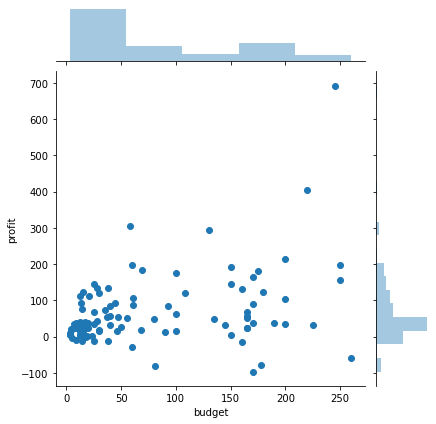

In [24]:
#Plot profit vs budget
sns.jointplot('budget','profit',movies)      #used to draw plots b/w to variables
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [25]:
#find the movies with negative profit
movies['title_year'][movies['profit']<0]


Title
Tucker and Dale vs Evil        2010
Amour                          2012
Rush                           2013
Warrior                        2011
Flipped                        2010
X-Men: First Class             2011
Scott Pilgrim vs. the World    2010
Tangled                        2010
Edge of Tomorrow               2014
The Little Prince              2015
Hugo                           2011
Name: title_year, dtype: int64

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [26]:
# Change the scale of MetaCritic
movies.MetaCritic=movies.MetaCritic/10
movies.head()    #used to display first n rows based on position


,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Title,,,,,,,,,,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497


In [27]:
# Find the average ratings
movies['Avg_rating']=(movies['IMDb_rating']+movies['MetaCritic'])/2
movies.head()


,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
Title,,,,,,,,,,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,7.50
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.60
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75


In [28]:
#Sort in descending order of average rating
movies=movies.sort_values(by=['Avg_rating'],ascending=False)
movies.head()


,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
Title,,,,,,,,,,,,,,,,,,,,,
Boyhood,2014,4.0,25.359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,7.9,...,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21.359200,8.95
12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,8.1,...,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.667870,8.85
Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,8.2,...,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367,8.80
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75
Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75


In [29]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8

df=movies[['title_year','IMDb_rating','MetaCritic','Avg_rating']]
df=df.loc[(abs(df.IMDb_rating-df.MetaCritic)<0.5)]
df.loc[df.Avg_rating>=8]


,title_year,IMDb_rating,MetaCritic,Avg_rating
Title,,,,
Whiplash,2014,8.5,8.8,8.65
Django Unchained,2012,8.4,8.1,8.25
Dallas Buyers Club,2013,8.0,8.4,8.20
Star Wars: Episode VII - The Force Awakens,2015,8.1,8.1,8.10
Arrival,2016,8.0,8.1,8.05
The Martian,2015,8.0,8.0,8.00
Gone Girl,2014,8.1,7.9,8.00


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [30]:
# Write your code here
group=movies.pivot_table(values=['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes'],index=['actor_1_name','actor_2_name','actor_3_name'])
group['Total likes']=group['actor_1_facebook_likes']+group['actor_2_facebook_likes']+group['actor_3_facebook_likes']
group


actor_1_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                           5000   
Albert Finney Helen McCrory   Rory Kinnear                             883   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                         559   
Amy Adams     Jeremy Renner   Forest Whitaker                        35000   
Amy Poehler   Mindy Kaling    Phyllis Smith                           1000   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               15000   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           27000   
              Christian Bale  Joseph Gordon-Levitt                   27000   
              Frank Grillo    Kevin Dunn                             27000   
Tom Hughes    Tom Hollander   Lindsay Duncan                           565   

                                                    actor_2_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                          972.0   
Albert Finney Helen McCrory   Rory Kinnear                           563.0   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       427.0   
Amy Adams     Jeremy Renner   Forest Whitaker                       5300.0   
Amy Poehler   Mindy Kaling    Phyllis Smith                          767.0   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               535.0   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                          9000.0   
              Christian Bale  Joseph Gordon-Levitt                 23000.0   
              Frank Grillo    Kevin Dunn                             798.0   
Tom Hughes    Tom Hollander   Lindsay Duncan                         555.0   

                                                    actor_3_facebook_likes  \
actor_1_name  actor_2_name    actor_3_name                                   
Aidan Turner  Adam Brown      James Nesbitt                          773.0   
Albert Finney Helen McCrory   Rory Kinnear                           393.0   
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor                       303.0   
Amy Adams     Jeremy Renner   Forest Whitaker                          NaN   
Amy Poehler   Mindy Kaling    Phyllis Smith                          384.0   
...                                                                    ...   
Tom Hanks     Mark Rylance    Amy Ryan                               423.0   
Tom Hardy     Charlize Theron ZoÃ« Kravitz                           943.0   
              Christian Bale  Joseph Gordon-Levitt                 23000.0   
              Frank Grillo    Kevin Dunn                             581.0   
Tom Hughes    Tom Hollander   Lindsay Duncan                         171.0   

                                                    Total likes  
actor_1_name  actor_2_name    actor_3_name                       
Aidan Turner  Adam Brown      James Nesbitt              6745.0  
Albert Finney Helen McCrory   Rory Kinnear               1839.0  
Aldis Hodge   Neil Brown Jr.  R. Marcos Taylor           1289.0  
Amy Adams     Jeremy Renner   Forest Whitaker               NaN  
Amy Poehler   Mindy Kaling    Phyllis Smith              2151.0  
...                                                         ...  
Tom Hanks     Mark Rylance    Amy Ryan                  15958.0  
Tom Hardy     Charlize Theron ZoÃ« Kravitz              36943.0  
              Christian Bale  Joseph Gordon-Levitt      73000.0  
              Frank Grillo    Kevin Dunn                28379.0  
Tom Hughes    Tom Hollander   Lindsay Duncan             1291.0  

[99 rows x 4 columns]

In [31]:
group.sort_values(by=['Total likes'],inplace=True,ascending=False)
group.head(5)

,,,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,Total likes
actor_1_name,actor_2_name,actor_3_name,,,,
Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0


- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [32]:
# Your answer here (optional)



- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

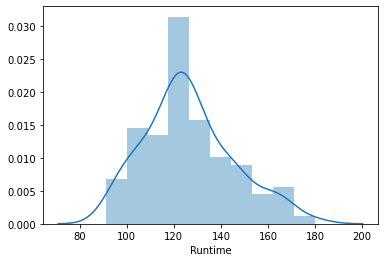

In [33]:
# Runtime histogram/density plot
sns.distplot(movies['Runtime'])


**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [34]:
# Write your code here
PopularR=movies[movies.content_rating=='R'].sort_values(by='CVotesU18',ascending=False)[['title_year','CVotesU18']].head(10)
PopularR


,title_year,CVotesU18
Title,,
Deadpool,2016,4598
The Wolf of Wall Street,2013,3622
Django Unchained,2012,3250
Mad Max: Fury Road,2015,3159
Whiplash,2014,2878
The Revenant,2015,2619
Shutter Island,2010,2321
Gone Girl,2014,2286
The Grand Budapest Hotel,2014,2083


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [35]:
# Create the dataframe df_by_genre

df_by_genre=movies[movies.columns[11:-6]] 

In [36]:
# Create a column cnt and initialize it to 1

df_by_genre['cnt']=1
df_by_genre

,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,...,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,cnt
Title,,,,,,,,,,,,,,,,,,,,,
Boyhood,NaN,NaN,10.0,165,49673,62055,76838,52238,23789,10431,...,8.1,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,1
12 Years a Slave,Drama,History,9.6,134,75556,126223,161460,83070,27231,9603,...,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,1
Inside Out,Adventure,Comedy,9.4,95,87509,113244,119801,67153,24210,8542,...,8.3,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,1
Toy Story 3,Adventure,Comedy,9.2,103,139773,149992,158704,88289,31291,11850,...,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,1
Manchester by the Sea,NaN,NaN,9.6,137,18191,33532,46596,29626,11879,4539,...,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Hobbit: An Unexpected Journey,Fantasy,NaN,NaN,169,135848,132202,191128,122538,51765,19699,...,8.0,8.2,7.7,7.7,7.9,7.7,7.6,8.0,7.5,1
Lone Survivor,Biography,Drama,NaN,121,30856,33356,68808,54195,20772,7205,...,7.7,7.8,7.3,7.3,7.6,7.5,7.4,7.8,6.8,1
About Time,Drama,Fantasy,NaN,123,38556,43170,70850,45487,16542,5673,...,8.0,8.0,7.6,7.6,7.7,7.6,7.5,7.8,6.9,1


In [37]:
# Group the movies by individual genres


df_by_g2 = df_by_genre.groupby('genre_2').sum()

df_by_g3 = df_by_genre.groupby('genre_3').sum()

In [38]:
# Add the grouped data frames and store it in a new data frame


df_all_genres=df_by_g2.add(df_by_g3, fill_value=0)
df_all_genres

,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,...,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,cnt
Action,30.7,472.0,238060.0,285510.0,430062.0,260106.0,88580.0,29250.0,10820.0,5521.0,...,31.9,32.7,30.9,30.7,31.8,30.5,30.4,31.4,29.0,4.0
Adventure,197.7,3217.0,2535880.0,2834374.0,3701787.0,2315706.0,846589.0,301985.0,124511.0,70144.0,...,208.1,210.9,201.9,201.1,205.7,199.7,198.8,204.2,191.7,26.0
Biography,32.2,574.0,185172.0,313178.0,576374.0,370003.0,119348.0,38643.0,14844.0,7974.0,...,39.6,39.4,38.3,38.2,38.5,38.0,37.9,38.8,35.4,5.0
Comedy,109.3,1633.0,1012399.0,1278082.0,1736456.0,1072503.0,394853.0,144919.0,61681.0,35253.0,...,112.2,112.0,108.8,108.7,109.4,107.3,107.2,108.4,102.7,14.0
Crime,15.7,301.0,191236.0,276897.0,336026.0,193797.0,71635.0,27230.0,11935.0,7523.0,...,16.2,15.2,15.5,15.7,14.9,15.2,15.2,14.9,15.0,2.0
Drama,350.8,5788.0,2323713.0,3441322.0,5279690.0,3240734.0,1112151.0,388438.0,159950.0,89280.0,...,375.0,371.3,362.0,362.1,362.1,359.1,358.1,364.5,339.5,47.0
Family,14.8,272.0,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,...,15.4,16.0,14.8,14.7,15.5,14.9,14.8,15.6,14.1,2.0
Fantasy,36.5,974.0,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,...,55.4,56.5,53.3,53.1,55.0,53.4,52.8,55.5,50.5,7.0
History,34.2,551.0,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,...,32.1,32.0,31.2,31.1,31.3,31.0,30.7,32.1,29.4,4.0
Horror,6.5,124.0,16572.0,19818.0,44460.0,35863.0,13456.0,4588.0,1684.0,855.0,...,7.6,7.6,7.5,7.5,7.7,7.5,7.4,7.7,7.1,1.0


In [39]:
# Extract genres with atleast 10 occurences
genre_top10=df_all_genres[df_all_genres['cnt']>=10]


In [40]:
# Take the mean for every column by dividing with cnt 

for i in df_all_genres.columns[:-1]:
    df_all_genres[i]=df_all_genres[i]/df_all_genres['cnt']
df_all_genres    

,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,...,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,cnt
Action,7.675000,118.000000,59515.000000,71377.500000,107515.500000,65026.500000,22145.000000,7312.500000,2705.000000,1380.250000,...,7.975000,8.175000,7.725000,7.675000,7.950000,7.625000,7.600000,7.850000,7.250000,4.0
Adventure,7.603846,123.730769,97533.846154,109014.384615,142376.423077,89065.615385,32561.115385,11614.807692,4788.884615,2697.846154,...,8.003846,8.111538,7.765385,7.734615,7.911538,7.680769,7.646154,7.853846,7.373077,26.0
Biography,6.440000,114.800000,37034.400000,62635.600000,115274.800000,74000.600000,23869.600000,7728.600000,2968.800000,1594.800000,...,7.920000,7.880000,7.660000,7.640000,7.700000,7.600000,7.580000,7.760000,7.080000,5.0
Comedy,7.807143,116.642857,72314.214286,91291.571429,124032.571429,76607.357143,28203.785714,10351.357143,4405.785714,2518.071429,...,8.014286,8.000000,7.771429,7.764286,7.814286,7.664286,7.657143,7.742857,7.335714,14.0
Crime,7.850000,150.500000,95618.000000,138448.500000,168013.000000,96898.500000,35817.500000,13615.000000,5967.500000,3761.500000,...,8.100000,7.600000,7.750000,7.850000,7.450000,7.600000,7.600000,7.450000,7.500000,2.0
Drama,7.463830,123.148936,49440.702128,73219.617021,112333.829787,68951.787234,23662.787234,8264.638298,3403.191489,1899.574468,...,7.978723,7.900000,7.702128,7.704255,7.704255,7.640426,7.619149,7.755319,7.223404,47.0
Family,7.400000,136.000000,49082.500000,47837.500000,90190.500000,71700.500000,29568.500000,11485.500000,4736.000000,2564.000000,...,7.700000,8.000000,7.400000,7.350000,7.750000,7.450000,7.400000,7.800000,7.050000,2.0
Fantasy,5.214286,139.142857,81778.857143,86031.857143,127109.571429,85678.142857,34547.285714,13354.857143,5629.000000,3176.142857,...,7.914286,8.071429,7.614286,7.585714,7.857143,7.628571,7.542857,7.928571,7.214286,7.0
History,8.550000,137.750000,37815.250000,65096.750000,98632.750000,55765.500000,16965.250000,5308.250000,1991.000000,1096.000000,...,8.025000,8.000000,7.800000,7.775000,7.825000,7.750000,7.675000,8.025000,7.350000,4.0
Horror,6.500000,124.000000,16572.000000,19818.000000,44460.000000,35863.000000,13456.000000,4588.000000,1684.000000,855.000000,...,7.600000,7.600000,7.500000,7.500000,7.700000,7.500000,7.400000,7.700000,7.100000,1.0


In [41]:
# Rounding off the columns of Votes to two decimals
for i in df_all_genres.columns:
    df_all_genres[i]=df_all_genres[i].round(2)
df_all_genres    



,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,...,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,cnt
Action,7.68,118.00,59515.00,71377.50,107515.50,65026.50,22145.00,7312.50,2705.00,1380.25,...,7.98,8.18,7.72,7.68,7.95,7.62,7.60,7.85,7.25,4.0
Adventure,7.60,123.73,97533.85,109014.38,142376.42,89065.62,32561.12,11614.81,4788.88,2697.85,...,8.00,8.11,7.77,7.73,7.91,7.68,7.65,7.85,7.37,26.0
Biography,6.44,114.80,37034.40,62635.60,115274.80,74000.60,23869.60,7728.60,2968.80,1594.80,...,7.92,7.88,7.66,7.64,7.70,7.60,7.58,7.76,7.08,5.0
Comedy,7.81,116.64,72314.21,91291.57,124032.57,76607.36,28203.79,10351.36,4405.79,2518.07,...,8.01,8.00,7.77,7.76,7.81,7.66,7.66,7.74,7.34,14.0
Crime,7.85,150.50,95618.00,138448.50,168013.00,96898.50,35817.50,13615.00,5967.50,3761.50,...,8.10,7.60,7.75,7.85,7.45,7.60,7.60,7.45,7.50,2.0
Drama,7.46,123.15,49440.70,73219.62,112333.83,68951.79,23662.79,8264.64,3403.19,1899.57,...,7.98,7.90,7.70,7.70,7.70,7.64,7.62,7.76,7.22,47.0
Family,7.40,136.00,49082.50,47837.50,90190.50,71700.50,29568.50,11485.50,4736.00,2564.00,...,7.70,8.00,7.40,7.35,7.75,7.45,7.40,7.80,7.05,2.0
Fantasy,5.21,139.14,81778.86,86031.86,127109.57,85678.14,34547.29,13354.86,5629.00,3176.14,...,7.91,8.07,7.61,7.59,7.86,7.63,7.54,7.93,7.21,7.0
History,8.55,137.75,37815.25,65096.75,98632.75,55765.50,16965.25,5308.25,1991.00,1096.00,...,8.02,8.00,7.80,7.78,7.82,7.75,7.68,8.02,7.35,4.0
Horror,6.50,124.00,16572.00,19818.00,44460.00,35863.00,13456.00,4588.00,1684.00,855.00,...,7.60,7.60,7.50,7.50,7.70,7.50,7.40,7.70,7.10,1.0


In [42]:
# Converting CVotes to int type
for i in df_all_genres.columns:
    if i.startswith('CVotes'):
        df_all_genres[i]=df_all_genres[i].astype('int')
df_all_genres.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Action to Western
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MetaCritic    19 non-null     float64
 1   Runtime       19 non-null     float64
 2   CVotes10      19 non-null     int32  
 3   CVotes09      19 non-null     int32  
 4   CVotes08      19 non-null     int32  
 5   CVotes07      19 non-null     int32  
 6   CVotes06      19 non-null     int32  
 7   CVotes05      19 non-null     int32  
 8   CVotes04      19 non-null     int32  
 9   CVotes03      19 non-null     int32  
 10  CVotes02      19 non-null     int32  
 11  CVotes01      19 non-null     int32  
 12  CVotesMale    19 non-null     int32  
 13  CVotesFemale  19 non-null     int32  
 14  CVotesU18     19 non-null     int32  
 15  CVotesU18M    19 non-null     int32  
 16  CVotesU18F    19 non-null     int32  
 17  CVotes1829    19 non-null     int32  
 18  CVotes1829M   19 non-null  

If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

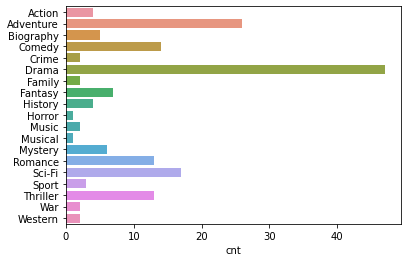

In [43]:
# Countplot for genres
sns.barplot(df_all_genres['cnt'],df_all_genres.index,data=df_all_genres)


**`Checkpoint 5:`** Is the bar for `Drama` the tallest?
1.yes


-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

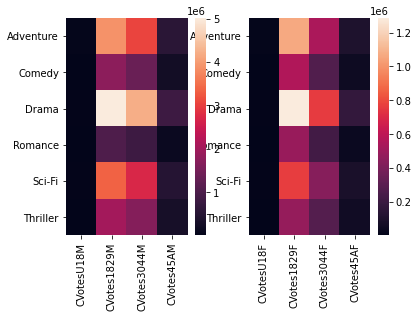

In [44]:
# 1st set of heat maps for CVotes-related columns
fig,(axs1,axs2)=plt.subplots(1,2)
sns.heatmap(genre_top10[['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM']],ax=axs1)
sns.heatmap(genre_top10[['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF']],ax=axs2)
plt.show()


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:Seeing all age groups across males and females, Under 19 and Above 45 age groups have significantly very low cvotes which raises the question if we are actually have enough users of IMDB in the those age groups.
- Inference 2: Males have voted lesser to watch a romantic movie than females irrespective of age category.
- Inference 3:Both Males and Females of age group 18-29 have voted for Scifi movies

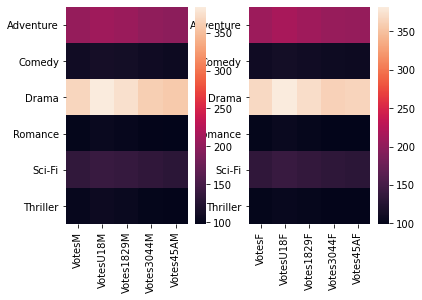

In [45]:
# 2nd set of heat maps for Votes-related columns

fig,(ax1,ax2)=plt.subplots(1,2)
sns.heatmap(genre_top10[genre_top10.columns[29:-1][genre_top10[genre_top10.columns[29:-1]].columns.str.contains('M')]],ax=ax1)
sns.heatmap(genre_top10[genre_top10.columns[29:-1][genre_top10[genre_top10.columns[29:-1]].columns.str.contains('F')]],ax=ax2)
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:Irrespective of Gender, Age group of 30+ have rated the genres with a lot of critique.
- Inference 2:Women of age group 18-29 have rated higher in Action and Adevnture which orthodoxically are liked more by Men.
- Inference 3:Thrillers have been much appreciated in general by Men more than Women in respective age groups.

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [46]:
# Creating IFUS column

movies['IFUS']=movies.Country.apply(lambda x:'USA' if x=='USA' else 'non-USA')
movies['IFUS']

Title
Boyhood                                  USA
12 Years a Slave                         USA
Inside Out                               USA
Toy Story 3                              USA
Manchester by the Sea                    USA
                                      ...   
The Hobbit: An Unexpected Journey        USA
Lone Survivor                            USA
About Time                           non-USA
The Book Thief                           USA
Flipped                                  USA
Name: IFUS, Length: 100, dtype: object

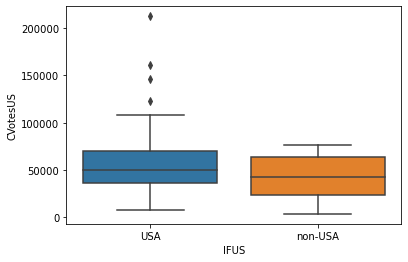

In [47]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
sns.boxplot(y='CVotesUS',x='IFUS',data=movies)


**`Inferences:`** Write your two inferences/observations below:
- Inference 1:More Number of people from US have voted for US based movies than non-USA based movies.
- Inference 2:Some of the movies from US have unusually high Cvotes than the usual trend.

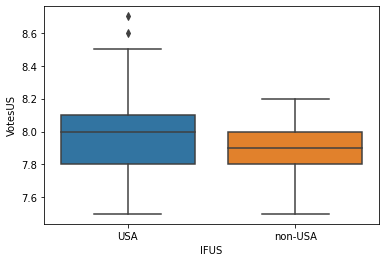

In [48]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
sns.boxplot(y='VotesUS',x='IFUS',data=movies)


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: US people  rated US based movies better than Non-US movies.
- Inference 2: almost 25% of users who have rated almost equally irresepctive of the country of origin of the movie.

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [49]:
# Sorting by CVotes1000
genre_top10.sort_values(by='CVotes1000',ascending=False,inplace=True)


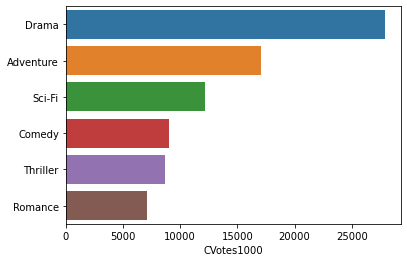

In [50]:
# Bar plot
sns.barplot(genre_top10['CVotes1000'],genre_top10.index,data=genre_top10)


**`Inferences:`** Write your inferences/observations here.
a. Top 1000 voters just as other voters have voted scifi to be the most popular category.
b. Top 1000 voters seem pretty fair across all genres.

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.